In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pathlib
from ngmt.datasets import keepcontrol
from ngmt.utils.ngmt_dataclass import NGMTRecording

In [91]:
sub_id = "pp002"
task_name = "tug"  # sub-pp008_task-tug_run-on_tracksys-imu_motion.tsv
run_name = None  # "on"
tracksys = "imu"

root_dir = f"/mnt/neurogeriatrics_data/Keep Control/Data/lab dataset/rawdata/sub-{sub_id}/motion"

if run_name:
    file_name = f"sub-{sub_id}_task-{task_name}_run-{run_name}_tracksys-{tracksys}_motion.tsv"
else:
    file_name = f"sub-{sub_id}_task-{task_name}_tracksys-{tracksys}_motion.tsv"
print(f"File name: {file_name:s}")

File name: sub-pp002_task-tug_tracksys-imu_motion.tsv


In [92]:
recording = keepcontrol.load_recording(
    file_name=os.path.join(
        root_dir,
        file_name
    ),
    tracking_systems=[tracksys],
    tracked_points={
        tracksys: [
            "pelvis"
        ]
    }
)
print(recording)

NGMTRecording(data={'imu':       pelvis_ACC_x  pelvis_ACC_y  pelvis_ACC_z  pelvis_ANGVEL_x  \
0         0.920901     -0.047850     -0.400888         0.000000   
1         0.919441     -0.051282     -0.392583         0.000000   
2         0.922828     -0.047359     -0.392093        -0.172905   
3         0.926741     -0.048830     -0.384279         0.262815   
4         0.918973     -0.053218     -0.397947         0.608625   
...            ...           ...           ...              ...   
2903      0.966803     -0.027822     -0.279782        -0.089911   
2904      0.957517     -0.035152     -0.285636         0.525631   
2905      0.960437     -0.034171     -0.291979         0.871441   
2906      0.962890     -0.036623     -0.299794         1.051262   
2907      0.963883     -0.038584     -0.294921         1.134256   

      pelvis_ANGVEL_y  pelvis_ANGVEL_z  pelvis_MAGN_x  pelvis_MAGN_y  \
0           -0.614677         0.436291       0.293709      -0.184328   
1           -0.700049   

In [93]:
# Extract the accelerometer and gyroscope data
acc_data = recording.data["imu"].loc[:, [f"pelvis_ACC_{x}" for x in ["x", "y", "z"]]]
gyr_data = recording.data["imu"].loc[:, [f"pelvis_ANGVEL_{x}" for x in ["x", "y", "z"]]]

In [94]:
# Extract the sampling frequency
fs = recording.channels[tracksys][
    recording.channels[tracksys]["name"] == "pelvis_ACC_x"
]["sampling_frequency"].values[0]
print(f"Sampling frequency: {fs:.1f} Hz")

Sampling frequency: 200.0 Hz


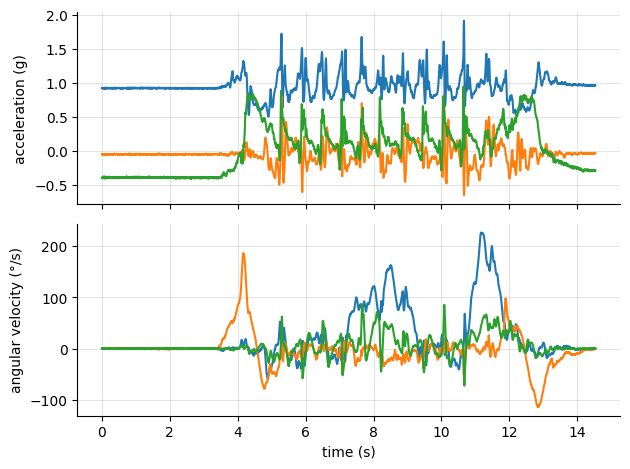

In [95]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(np.arange(acc_data.shape[0])/fs, acc_data)
axs[1].plot(np.arange(gyr_data.shape[0])/fs, gyr_data)
axs[0].set_ylabel("acceleration (g)")
axs[1].set_ylabel("angular velocity (\N{degree sign}/s)")
axs[1].set_xlabel("time (s)")
for ax in axs:
    ax.grid(which="both", axis="both", c="tab:gray", alpha=0.2)
    ax.spines[["top", "right"]].set_visible(False)
plt.tight_layout()
plt.show()

In [96]:
data = recording.data[tracksys].loc[:,[f"pelvis_{ch_type}_{ch_comp}"
                                       for ch_type in ["ACC", "ANGVEL"]
                                       for ch_comp in ["x", "y", "z"]]]
data

,pelvis_ACC_x,pelvis_ACC_y,pelvis_ACC_z,pelvis_ANGVEL_x,pelvis_ANGVEL_y,pelvis_ANGVEL_z
0,0.920901,-0.047850,-0.400888,0.000000,-0.614677,0.436291
1,0.919441,-0.051282,-0.392583,0.000000,-0.700049,0.176093
2,0.922828,-0.047359,-0.392093,-0.172905,-0.261807,-0.262826
3,0.926741,-0.048830,-0.384279,0.262815,-0.261807,0.000000
4,0.918973,-0.053218,-0.397947,0.608625,-0.614677,-0.349559
...,...,...,...,...,...,...
2903,0.966803,-0.027822,-0.279782,-0.089911,-1.309034,0.000000
2904,0.957517,-0.035152,-0.285636,0.525631,-0.438242,-0.436291
2905,0.960437,-0.034171,-0.291979,0.871441,-0.961855,0.086733
2906,0.962890,-0.036623,-0.299794,1.051262,-0.700049,0.176093


In [97]:
from ngmt.modules.ssd import PhamSittoStandStandtoSitDetection
pts = PhamSittoStandStandtoSitDetection()
pts = pts.detect(
    data=data, sampling_freq_Hz=fs
)

/home/robbin/.cache/pypoetry/virtualenvs/ngmt-CBrNr8GT-py3.10/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [98]:
pts.postural_transitions_

,onset,duration,event_type,postural transition angle,maximum flexion velocity,maximum extension velocity,tracking_systems,tracked_points
0,3.505,4.560,stand to sit,71.565427,6,186,imu,LowerBack
1,9.500,1.855,sit to stand,23.409653,36,18,imu,LowerBack
